## Bank customer churn prediction

to predict if the customer will leave the bank or not

In [6]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv("churn_modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data preprocessing 1

In [7]:
# check the shape of the dataset
data.shape

(10000, 14)

In [9]:
# drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
#check to see if the columns have been dropped by looking at the shape
data.shape

(10000, 11)

Check for null/missing values

In [11]:
# check for missing values
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# check for data types
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
# check for duplicates
data.duplicated().sum()

0

In [14]:
# renaming exited column to churn
data.rename(columns={'Exited':'Churn'}, inplace=True)

In [15]:
# descriptive statistics
data.describe

<bound method NDFrame.describe of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts   
0             619    France  Female   42       2       0.00              1  \
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMemb

### Explorative Data Analysis



I will be looking at the distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable. I will start by looking at the distribution of the data,followed by the relationship between the features and the target variable,

Pie chart for Customer Churn

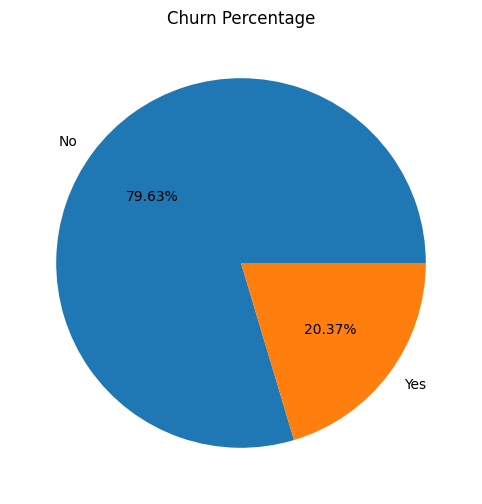

In [17]:
# pie chart
plt.figure(figsize=(10,6))
plt.pie(data['Churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the
customers in the dataset continue to use the serivces of the bank with only 20.4% of the
customers churning

#### Gender

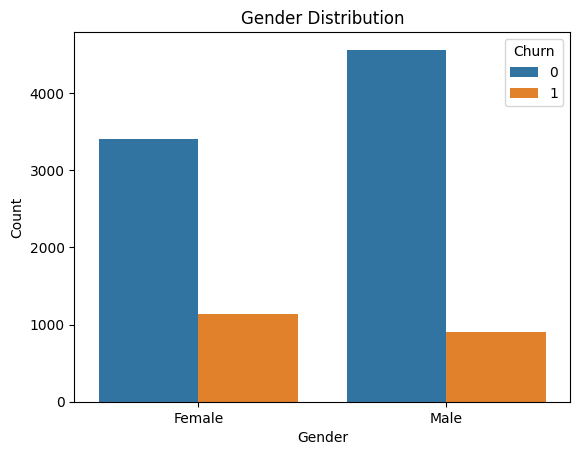

In [18]:
# gender and customer churn
sns.countplot(x = 'Gender', data = data, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the
customer churn, we can see that females have more tendency to churn as compared to
males. However there is not much difference between the churn count of the two
genders so we cannot have a hypothesis regarding the customer churn based on the
gender of the customer.


Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

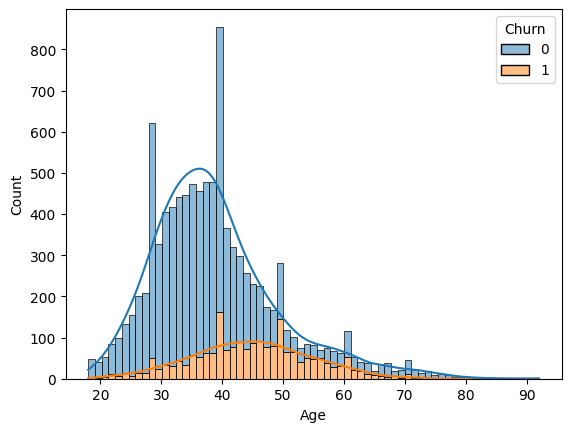

In [19]:
# histogram for age distribution
sns.histplot(data=data, x="Age", hue="Churn", multiple="stack", kde=True)

This histtogram visualizes the age distribution and the churn count of the customers. The
majority of the customers are from age group 30-40 years old. However the customer
churn count is highest for the customersof age 40 and 50. In addition to that customers
from age group 20-25 years old count for the lowest churn count. Therefore, age plays a
significant role in customer churn, where late adults are more likely to churn as
compared to young adults with minimal churn count.

Credit score

<Axes: xlabel='Churn', ylabel='CreditScore'>

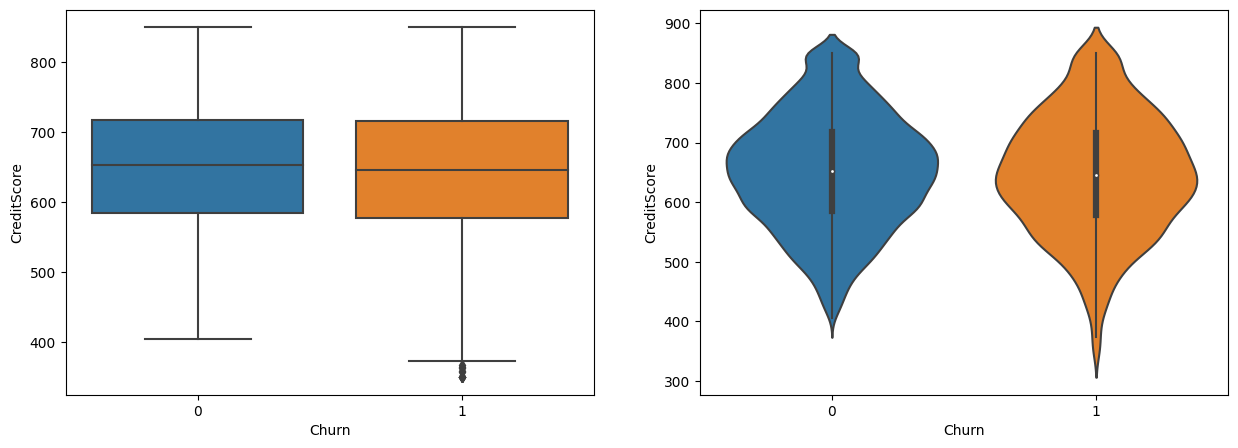

In [21]:
# boxplot and violin plot for credit score
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Churn", y="CreditScore", data=data, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=data, ax=ax[1])

The boxplot and violinplot shows the distribution of curstomer's credit score along with
their churn. In the boxplot, the median of both the churn and non churn customers aalmost same. In addition to that, the shape of violinplot is also similar for both the churn
and non churn customers. However some churn customers have low credit score, but on
the whole, the credit score is not a good indicator of churn.

Customer location

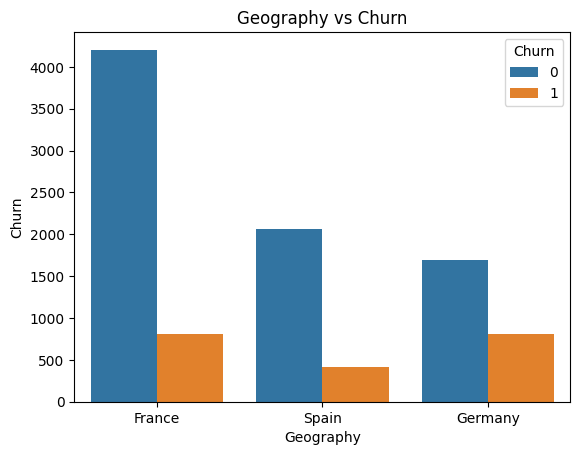

In [22]:
sns.countplot(x='Geography', hue = 'Churn', data = data)
plt.title('Geography vs Churn')
plt.xlabel('Geography')
plt.ylabel('Churn')
plt.show()

This graphs shows the number of customers from the their repective countries aling with
their churn count. Majority of the customers are from France, followed by Spain and
Germany. However in contrast to that Germany has the highest number of customer curn
followed by France and Spain. From this we can infer that German customers are more
likely to churn than the customers from other countries.


Tenure

<Axes: xlabel='Tenure', ylabel='count'>

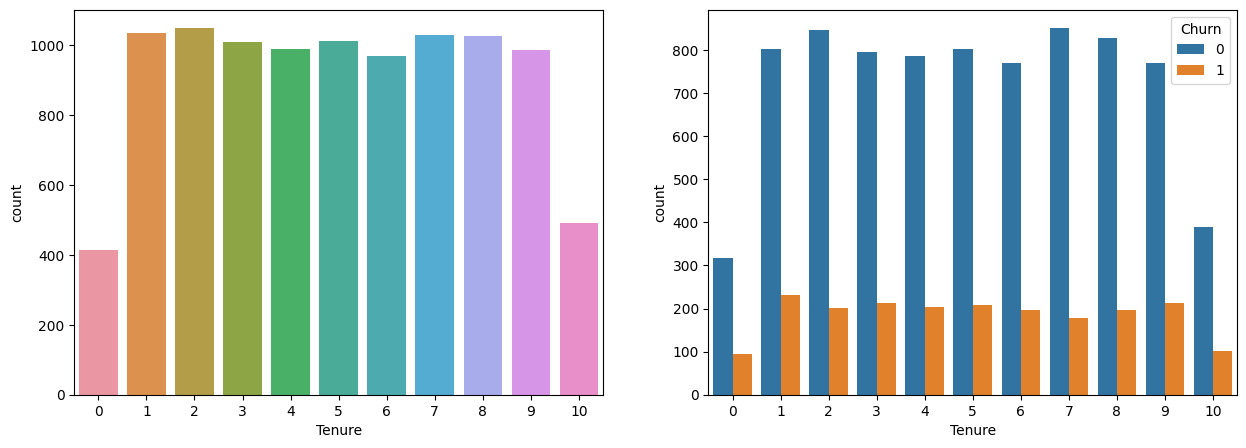

In [25]:
# subplots to show how long clients stay at the bank
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=data, ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=data, ax=ax[1])

From the graph, majrity of customers stay in the bank from 1-9 years.Majority of churn occur at 9 years.On the otherhand, customers who have stayed in the bank for more than 9 years have less churning rate.

Bank Balance

<Axes: xlabel='Balance', ylabel='Count'>

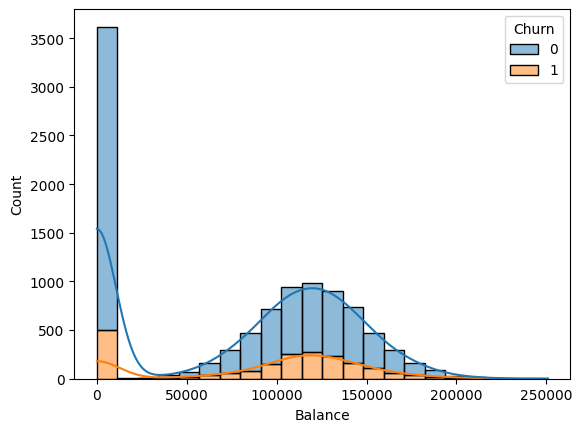

In [27]:
#histplot of bankbalance vs churn
sns.histplot(data=data, x='Balance', hue='Churn', multiple='stack', kde=True)

The above visualization shows that customers with less balance tend to churn most compared to the customers with a good balance